# Setup

In [33]:
%load_ext kedro.ipython
import pandas as pd
import numpy as np

from thefuzz import fuzz
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [34]:
%reload_kedro
df = catalog.load("prim_mibolsillo")
df

[04/02/24 21:44:52] INFO     Resolved project path as:                                              ]8;id=601369;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=89844;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/02/24 21:44:53] INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=500652;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=937355;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=347879;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=558501;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=596921;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=986484;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Loading data from prim_mibolsillo (ParquetDataset)...              ]8;id=3894;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=220051;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,id,branch_number,city,state,age,gender,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,geobr_purchase_city,geobr_purchase_city_conf,geobr_purchase_state
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-12-04,31.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-11-09,15001.0,FARMACIAS,SANTOS,BR,Santos,1.00,SP
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-05-06,50.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-06-01,544.0,M.O.T.O.,OSASCO,BR,Osasco,1.00,SP
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-06-01,3279.0,M.O.T.O.,OSASCO,BR,Osasco,1.00,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5305,2020-01-23,255.0,RESTAURANTE,SAO PAULO,BR,São Paulo,0.94,SP
4951,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5266,2020-01-23,395.0,SUPERMERCADOS,SAO PAULO,BR,São Paulo,0.94,SP
4952,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5445,2020-02-19,7556.0,RESTAURANTE,SAO PAULO,BR,São Paulo,0.94,SP
4953,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5002,2020-03-30,59.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP


# Feature Engineering

In [35]:
model_data = df[['total_credit_card_limit', 'current_available_limit', 'amount']] # take only numerical columns
model_data.head()

,total_credit_card_limit,current_available_limit,amount
0,4700,5605,31.0
1,4700,5343,15001.0
2,4700,2829,50.0
3,4700,2547,544.0
4,4700,2515,3279.0


In [36]:
model_data['total_minus_current'] = model_data['total_credit_card_limit'] - model_data['current_available_limit']
model_data['current_available_limit_ratio'] = model_data['current_available_limit'] / model_data['total_credit_card_limit']
model_data['amount_ratio_from_total'] = model_data['amount'] / model_data['total_credit_card_limit']
model_data['amount_ratio_from_current'] = model_data['amount'] / model_data['current_available_limit']
model_data.head()


,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777


In [37]:
model_data['is_F'] = np.where(df.gender == 'F', 1, 0)
model_data['is_M'] = np.where(df.gender == 'M', 1, 0)
model_data.head()

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0


In [38]:
# model_data['is_the_same_city'] = df[['city', 'purchase_city']].apply(lambda city, purchase_city: fuzz.ratio(city, purchase_city))
model_data['is_the_same_city'] = df.apply(lambda row: fuzz.ratio(row.city, row.purchase_city)/100, axis=1)
model_data['is_the_state'] = df.apply(lambda row: fuzz.ratio(row.state, row.geobr_purchase_state)/100, axis=1)
model_data['is_the_state_conf'] = model_data['is_the_state'] * df['geobr_purchase_city_conf']
model_data.head()

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M,is_the_same_city,is_the_state,is_the_state_conf
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0,0.48,1.0,0.94
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0,0.23,1.0,1.00
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0,0.48,1.0,0.94
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0,0.23,1.0,1.00
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0,0.23,1.0,1.00


# Labels

Due to the significant imbalance in label counts, I opted for a more meaningful grouping approach: grouping by purpose. Here's the breakdown:

```yaml
expense_groups:
  Services: ["SERVI‚O", "RESTAURANTE"]
  Necessities: [ "SUPERMERCADOS", "FARMACIAS", "POSTO DE GAS", "M.O.T.O."]
  Discretionary: ["VAREJO", "VESTUARIO", "ARTIGOS ELETRO", "MOVEIS E DECOR", "AUTO PE‚AS", "JOALHERIA"]
  Travel: ["CIA AEREAS", "HOTEIS", "AGENCIA DE TUR"]
```

In [39]:
df['category_expense'].value_counts()


category_expense
SERVI‚O           1769
RESTAURANTE        871
VAREJO             599
SUPERMERCADOS      468
VESTUARIO          236
FARMACIAS          222
POSTO DE GAS       199
M.O.T.O.           177
ARTIGOS ELETRO     122
LOJA DE DEPART      80
CIA AEREAS          36
HOTEIS              24
HOSP E CLINICA      18
SEM RAMO            16
MOVEIS E DECOR      15
MAT CONSTRUCAO      15
AUTO PE‚AS          14
AGENCIA DE TUR      12
JOALHERIA            6
ALUG DE CARROS       1
Name: count, dtype: int64

In [40]:
%reload_kedro

[04/02/24 21:44:55] INFO     Resolved project path as:                                              ]8;id=837955;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=759455;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=864114;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=974129;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=458128;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=280967;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=719729;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=223551;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

In [41]:
expense_groups = catalog.load("params:expense_groups")
display(expense_groups)

# Create a function to assign labels based on expense groups
def assign_label(expense):
    for group, labels in expense_groups.items():
        if expense in labels:
            return group
    return "Other"

model_data['label'] = df['category_expense'].apply(assign_label)
model_data.label.value_counts()

[04/02/24 21:44:56] INFO     Loading data from params:expense_groups (MemoryDataset)...         ]8;id=187141;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=330445;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\


{
    'Services': ['SERVI‚O', 'RESTAURANTE'],
    'Necessities': ['SUPERMERCADOS', 'FARMACIAS', 'POSTO DE GAS', 'M.O.T.O.'],
    'Discretionary': [
        'VAREJO',
        'VESTUARIO',
        'ARTIGOS ELETRO',
        'MOVEIS E DECOR',
        'AUTO PE‚AS',
        'JOALHERIA'
    ],
    'Travel': ['CIA AEREAS', 'HOTEIS', 'AGENCIA DE TUR']
}


label
Services         2640
Necessities      1066
Discretionary     992
Other             130
Travel             72
Name: count, dtype: int64

# Visualization

In [42]:
%reload_kedro
df = catalog.load("model_data")
df

                    INFO     Resolved project path as:                                              ]8;id=342681;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=139820;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=267500;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=327595;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=814519;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=582094;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

[04/02/24 21:44:57] INFO     Registered line magic 'run_viz'                                        ]8;id=461939;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=906703;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Loading data from model_data (ParquetDataset)...                   ]8;id=216853;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=322325;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M,is_the_same_city,is_the_state,is_the_state_conf,label,category_expense
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0,0.48,1.0,0.94,Services,SERVI‚O
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0,0.23,1.0,1.00,Necessities,FARMACIAS
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0,0.48,1.0,0.94,Services,SERVI‚O
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0,0.23,1.0,1.00,Necessities,M.O.T.O.
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0,0.23,1.0,1.00,Necessities,M.O.T.O.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,8500,5305,255.0,3195,0.624118,0.030000,0.048068,0,1,1.00,1.0,0.94,Services,RESTAURANTE
4951,8500,5266,395.0,3234,0.619529,0.046471,0.075009,0,1,1.00,1.0,0.94,Necessities,SUPERMERCADOS
4952,8500,5445,7556.0,3055,0.640588,0.888941,1.387695,0,1,1.00,1.0,0.94,Services,RESTAURANTE
4953,8500,5002,59.0,3498,0.588471,0.006941,0.011795,0,1,1.00,1.0,0.94,Services,SERVI‚O


In [43]:
min_df = df[['total_minus_current', 'current_available_limit_ratio', 'is_the_state_conf', 'is_the_same_city', 'category_expense', 'label']].sample(100, random_state=0)
min_df

,total_minus_current,current_available_limit_ratio,is_the_state_conf,is_the_same_city,category_expense,label
3340,2637,0.023333,0.94,1.0,RESTAURANTE,Services
1148,441,0.632500,0.94,1.0,VAREJO,Discretionary
4467,416,0.168000,0.94,1.0,SERVI‚O,Services
3122,1598,0.500625,0.94,1.0,VAREJO,Discretionary
2547,1337,0.966575,0.00,0.4,CIA AEREAS,Travel
...,...,...,...,...,...,...
2728,-166,1.030182,0.94,1.0,SUPERMERCADOS,Necessities
381,-441,1.080182,0.94,0.4,SERVI‚O,Services
149,2633,0.307105,0.94,1.0,M.O.T.O.,Necessities
3315,3355,0.161250,0.94,1.0,RESTAURANTE,Services


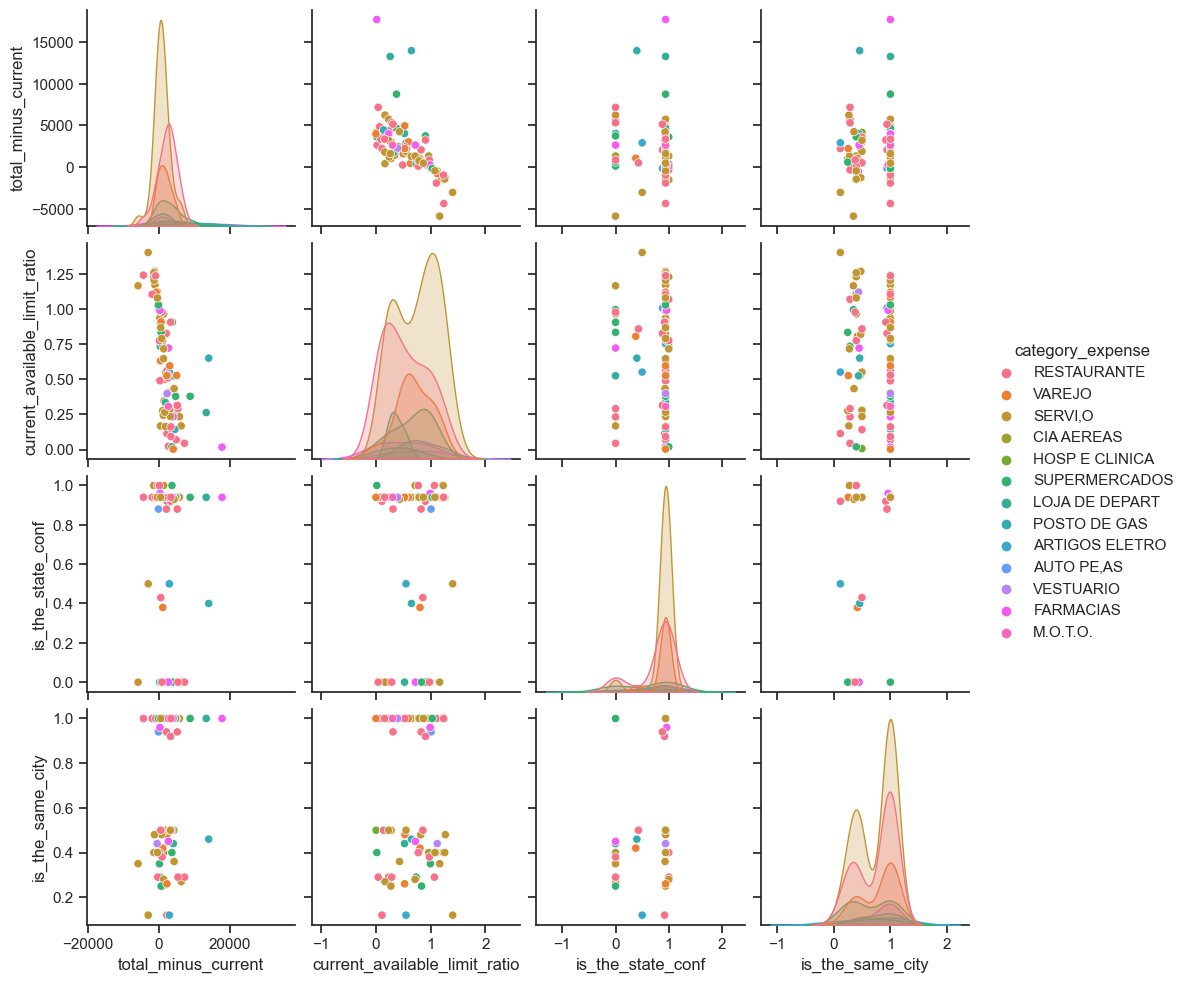

In [44]:
sns.set_theme(style="ticks")
sns.pairplot(min_df, hue="category_expense")

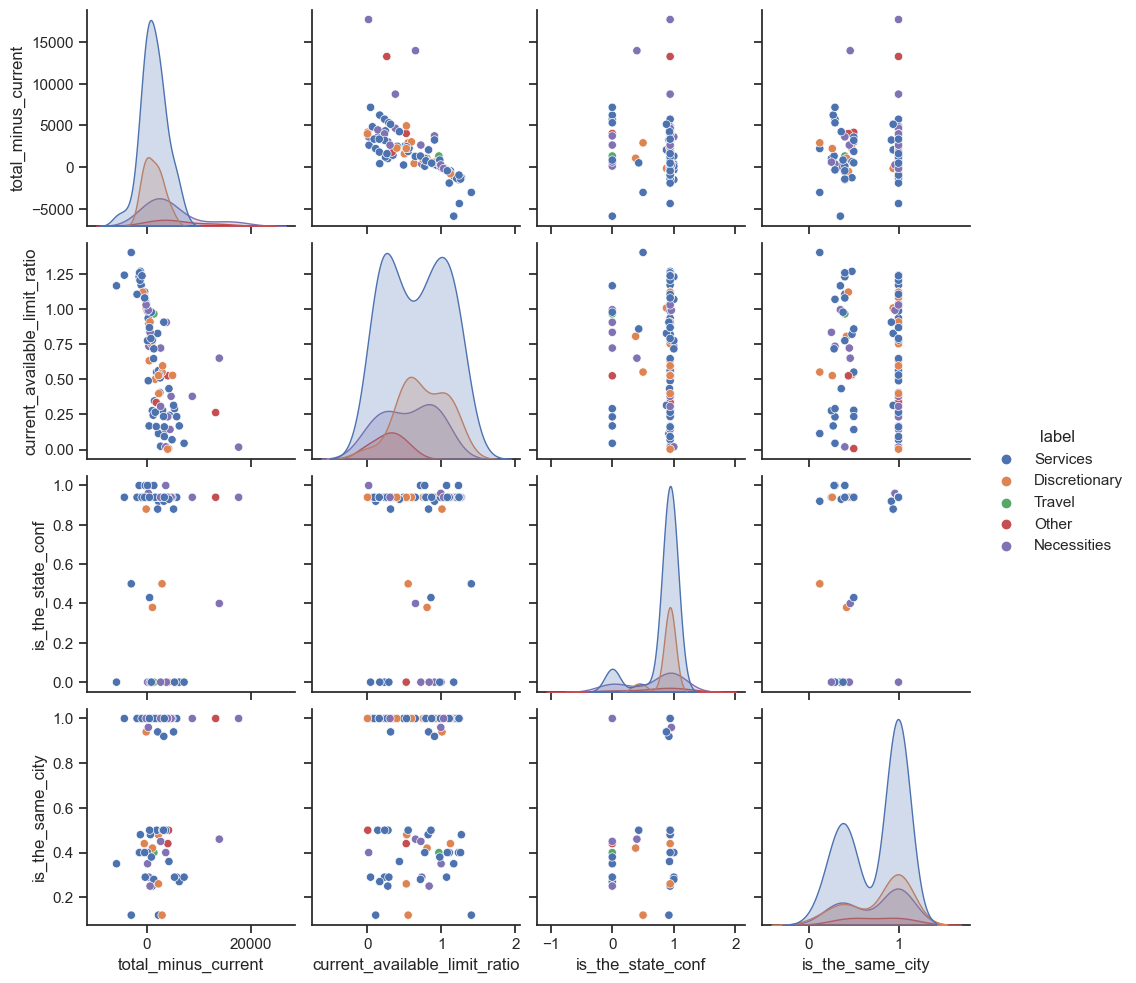

In [45]:
sns.set_theme(style="ticks")
sns.pairplot(min_df, hue="label")

# Model